In [8]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Define the data directory
data_dir = '/data'
#os.chdir(data_dir)
print(os.getcwd())  # Verify the current working directory


/home/jovyan/FunGut2/John


Checking out the reads

In [ ]:
! qiime demux summarize \
  --i-data ./data/fungut_forward_reads.qza \
  --o-visualization ./data/fungut_forward_reads_summary.qzv

In [ ]:
Visualization.load('/home/jovyan/FunGut2/John/data/fungut_forward_reads_summary.qzv')

Checking out the metadata

In [ ]:
# Check metadata file formatting
!qiime metadata tabulate \
  --m-input-file /home/jovyan/FunGut2/John/data/fungut_metadata.tsv \
  --o-visualization /home/jovyan/FunGut2/John/data/metadata.qzv

In [15]:
Visualization.load('/home/jovyan/FunGut2/John/data/metadata.qzv')

<visualization: Visualization uuid: 94e9adb0-0387-42c8-85a0-9d502ffdb659>

Denoising step

In [7]:
!qiime tools peek ./data/rep-seqs.qza

UUID:        1866201b-f5b3-4750-9a79-c22d6031a2aa
Type:        FeatureData[Sequence]
Data format: DNASequencesDirectoryFormat


In [ ]:
!qiime dada2 denoise-single \
  --i-demultiplexed-seqs ./data/fungut_forward_reads.qza \
  --p-trim-left 0 \
  --p-trunc-len 150 \
  --o-representative-sequences ./data/rep-seqs.qza \
  --o-table ./data/table.qza \
  --o-denoising-stats ./data/denoising-stats.qza

Classification

In [ ]:
'''
!qiime feature-classifier classify-sklearn \
  --i-classifier ./data/classifiers/'unite_ver10_99_04.04.2024-Q2-2024.5.qza' \
  --i-reads ./data/rep-seqs.qza \
  --p-reads-per-batch 10 \
  --p-n-jobs 0 \
  --o-classification ./taxonomy.qza
'''

In [ ]:
# tabulation of the taxonomy classification only 99, so the too basic classifier, without eukaryotes
!qiime metadata tabulate \
  --m-input-file ./data/taxonomy.qza \
  --o-visualization ./data/taxonomy.qzv

In [ ]:
Visualization.load('/home/jovyan/FunGut2/John/data/taxonomy.qzv')

In [ ]:
!qiime metadata tabulate \
  --m-input-file ./taxonomy_unite_dynamic_s_all.qza \
  --o-visualization ./taxonomy_unite_dynamic_s_all.qzv

In [15]:
Visualization.load('./taxonomy_unite_dynamic_s_all.qzv')

<visualization: Visualization uuid: 5ae77c4a-c5b8-46c0-8b57-5f6234aa07ba>

In [ ]:
!qiime taxa barplot \
  --i-table ./data/table.qza \
  --i-taxonomy ./taxonomy_unite_dynamic_s_all.qza \
  --m-metadata-file ./data/fungut_metadata.tsv \
  --o-visualization ./data/taxa-bar-plots.qzv


In [ ]:
Visualization.load('./data/taxa-bar-plots.qzv')

In [12]:
!qiime feature-table summarize \
  --i-table ./data/table.qza \
  --o-visualization ./data/table-summary.qzv

Saved Visualization to: ./data/table-summary.qzv


In [ ]:
Visualization.load('./data/table-summary.qzv')

Filtering the feature table to exclude eukaryotes

In [17]:
!qiime taxa filter-table \
  --i-table ./data/table.qza \
  --i-taxonomy ./taxonomy_unite_dynamic_s_all.qza \
  --p-exclude Eukaryota,Unassigned \
  --o-filtered-table ./data/filtered-feature-table.qza


Saved FeatureTable[Frequency] to: ./data/filtered-feature-table.qza


In [21]:
!qiime feature-table summarize\
    --i-table ./data/filtered-feature-table.qza \
    --o-visualization ./data/filtered-feature-table_summary.qzv

Saved Visualization to: ./data/filtered-feature-table_summary.qzv


In [25]:
Visualization.load('./data/filtered-feature-table_summary.qzv')

<visualization: Visualization uuid: e6a080e5-3bd7-4571-9484-81ac91b3d5b1>

In [2]:
Visualization.load('fasttree-tree-rooted.qzv')

<visualization: Visualization uuid: 94c735db-04a5-47d4-a4e0-e9b083539786>

Alpha rarefaction

In [9]:
!qiime diversity alpha-rarefaction \
  --i-table ./data/filtered-feature-table.qza \
  --i-phylogeny ./data/fasttree-tree-rooted.qza \
  --p-max-depth  30000 \
  --m-metadata-file ./data/fungut_metadata.tsv \
  --o-visualization ./data/alpha-rarefaction.qzv


Saved Visualization to: ./data/alpha-rarefaction.qzv


In [10]:
Visualization.load('./data/alpha-rarefaction.qzv')

<visualization: Visualization uuid: 739aa812-caf2-40f4-b796-6647c7b8d96d>

In [11]:
! qiime diversity core-metrics-phylogenetic \
  --i-table ./data/filtered-feature-table.qza \
  --i-phylogeny ./data/fasttree-tree-rooted.qza \
  --m-metadata-file ./data/fungut_metadata.tsv \
  --p-sampling-depth 5000 \
  --output-dir ./data/core-metrics-results

Saved FeatureTable[Frequency] to: ./data/core-metrics-results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: ./data/core-metrics-results/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: ./data/core-metrics-results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: ./data/core-metrics-results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: ./data/core-metrics-results/evenness_vector.qza
Saved DistanceMatrix to: ./data/core-metrics-results/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: ./data/core-metrics-results/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: ./data/core-metrics-results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: ./data/core-metrics-results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: ./data/core-metrics-results/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: ./data/core-metrics-results/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: ./data/core-metrics-results/jac

In [4]:
import os
from ipywidgets import Dropdown, Output
from IPython.display import display
from qiime2 import Visualization  # Adjust this import based on your environment

def list_qzv_files(directory):
    return [f for f in os.listdir(directory) if f.endswith('.qzv') and os.path.isfile(os.path.join(directory, f))]

directory = './data/core-metrics-results'  # Your directory
qzv_files = list_qzv_files(directory)

dropdown = Dropdown(
    options=qzv_files,
    description='Select .qzv file:',
    disabled=False,
)

out = Output()

def on_file_change(change):
    with out:
        out.clear_output()  # Clear previous output
        selected_file = change["new"]
        print(f'Selected file: {selected_file}')
        # Load and display the selected .qzv file
        visualization = Visualization.load(os.path.join(directory, selected_file))
        display(visualization)  # This will display the visualization

dropdown.observe(on_file_change, names='value')

display(dropdown, out)


Dropdown(description='Select .qzv file:', options=('bray_curtis_emperor.qzv', 'jaccard_emperor.qzv', 'weighted…

Output()

In [46]:
import qiime2 as q2
types = 'gluten'

div = q2.Artifact.load('./data/core-metrics-results/faith_pd_vector.qza').view(pd.Series)
md = pd.read_csv('./data/fungut_metadata.tsv', sep='\t', index_col=0)[f'{types}_sample']

/opt/conda/lib/python3.9/site-packages/q2_types/sample_data/_transformer.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')


In [47]:
# concatenate the series that we provided
dd = pd.concat([div, md], axis=1, join='inner')

In [48]:
dd.head()

,faith_pd,gluten_sample
ERR5327198,8.751153,No
ERR5327199,5.565908,I was diagnosed with gluten allergy (anti-glut...
ERR5327266,6.011762,I do not eat gluten because it makes me feel bad
ERR5327282,6.742598,No
ERR5327284,9.420526,No


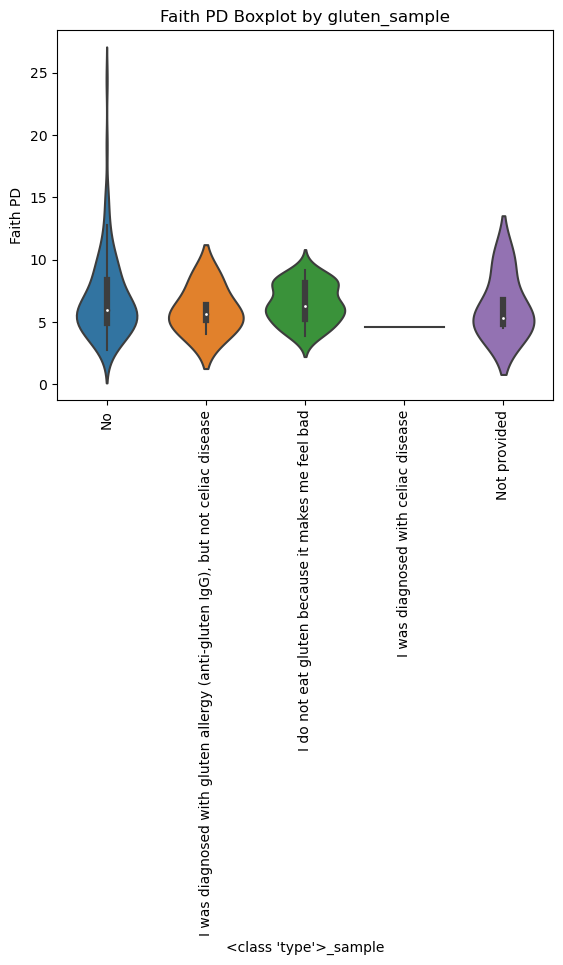

In [52]:
# make a boxplot with Faith PD on the y-axis and "sample_type" on the x-axis (hint: look at the "by" parameter)
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x=f'{types}_sample', y = dd.columns[0], data = dd)
plt.xlabel(f'{type}_sample')
plt.xticks(rotation = 90)
plt.ylabel('Faith PD')
plt.title(f'Faith PD Boxplot by {types}_sample')
plt.show()